In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
img_files = glob('training/*jpg')
print(img_files)
print(len(img_files))
print(img_files[0])

['training/tr_02_image_13.jpg', 'training/tr_02_image_1.jpg', 'training/tr_1_image_6.jpg', 'training/tr_05_image_13.jpg', 'training/tr_05_image_12.jpg', 'training/tr_1_image_7.jpg', 'training/tr_02_image_12.jpg', 'training/tr_02_image_10.jpg', 'training/tr_02_image_2.jpg', 'training/tr_1_image_5.jpg', 'training/test_image_9.jpg', 'training/tr_05_image_10.jpg', 'training/tr_05_image_11.jpg', 'training/test_image_8.jpg', 'training/tr_1_image_4.jpg', 'training/tr_02_image_3.jpg', 'training/tr_02_image_11.jpg', 'training/tr_005_image_12.jpg', 'training/tr_02_image_15.jpg', 'training/tr_02_image_7.jpg', 'training/tr_05_image_15.jpg', 'training/tr_05_image_14.jpg', 'training/tr_1_image_1.jpg', 'training/tr_02_image_6.jpg', 'training/tr_02_image_14.jpg', 'training/tr_005_image_13.jpg', 'training/tr_005_image_11.jpg', 'training/tr_02_image_16.jpg', 'training/tr_02_image_4.jpg', 'training/tr_1_image_3.jpg', 'training/tr_05_image_16.jpg', 'training/tr_05_image_8.jpg', 'training/tr_05_image_9.jpg

In [3]:
def get_color_from_circle(img, center, radius, vis= False):
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)
    masked_image = cv2.bitwise_and(img, img, mask=mask)
    mean_color = cv2.mean(masked_image, mask=mask)
    mean_color = tuple(int(x) for x in mean_color)[:3]
    if vis:
        f, ax = plt.subplots(figsize=(6, 6))
        cv2.circle(img, center, radius, (0, 255, 0), 2)  # Color verde para el círculo, grosor 2
        cv2.circle(img, center, 20, (0, 0, 0), 10)
        cv2.circle(img, center, 20, (mean_color[0], mean_color[1], mean_color[2]), -1)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        plt.show()
    return mean_color

def img_cambiar_nombre_de_la_funcion(img, circulos, colors):
    mod_img = img.copy()
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
    if colors is not None:
        for n , col in enumerate(colors):
            center = circulos[0][n][:2]
            radius = circulos[0][n][2]
            cv2.circle(mod_img, center, radius, (0, 255, 0), 2)
            cv2.circle(mod_img, center, 20, (0, 0, 0), 10)
            cv2.circle(mod_img, center, 20, (col[0], col[1], col[2]), -1)
            cv2.putText(mod_img, f'{radius}', center-np.array([10,0]), 0, .5, (0,0,0), 1)
            
    ax1.imshow(cv2.cvtColor(mod_img, cv2.COLOR_BGR2RGB))
    ax2.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax2.axis('off')
    plt.show()

0 tr_2_image_2


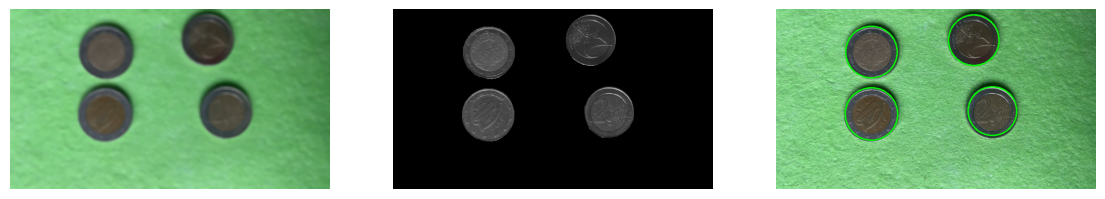

1 tr_2_image_3


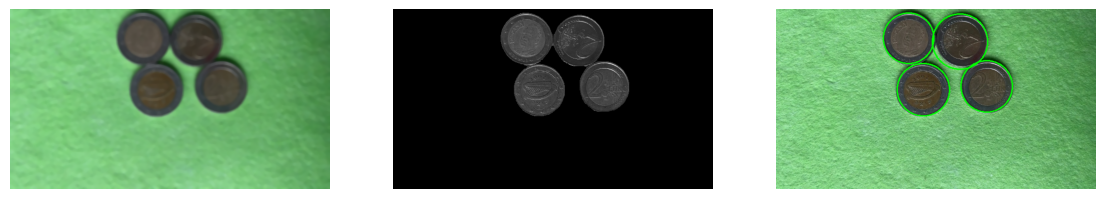

2 tr_2_image_1


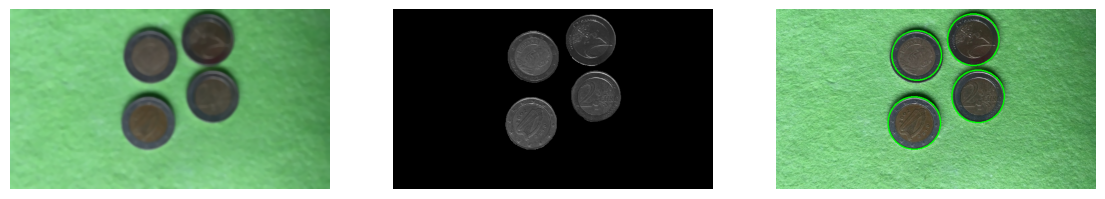

3 tr_2_image_4


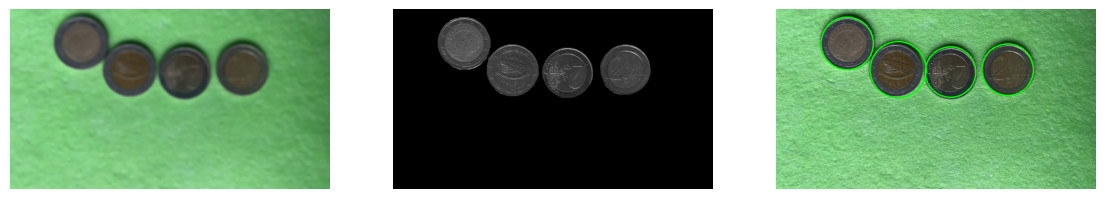

4 tr_2_image_5


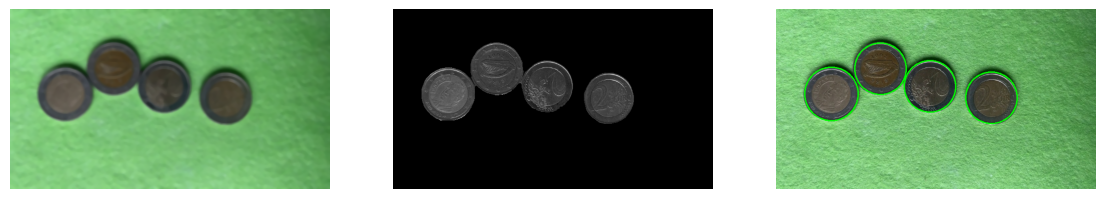

5 tr_2_image_7


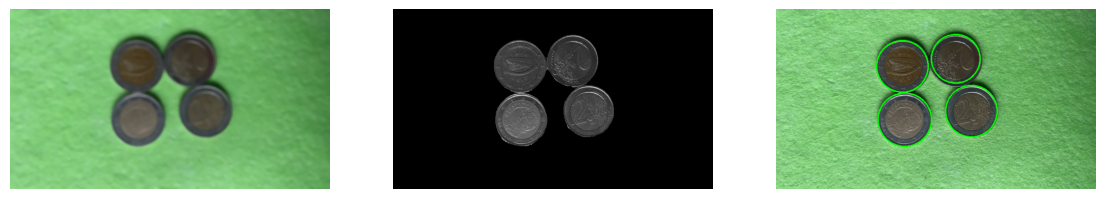

6 tr_2_image_18


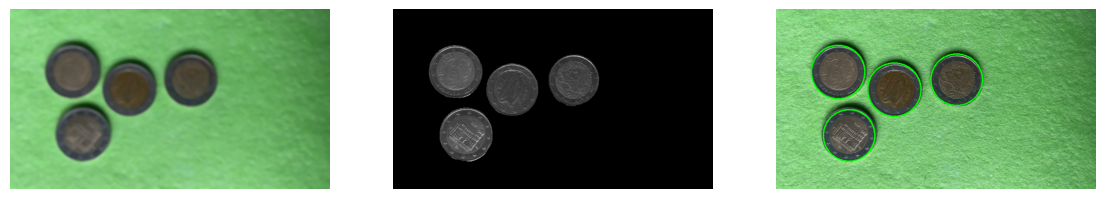

7 tr_2_image_6


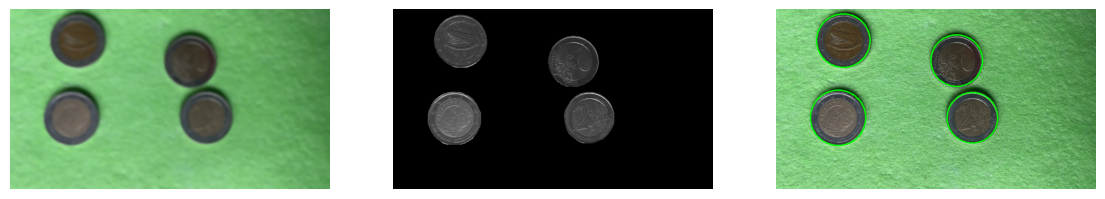

8 tr_2_image_15


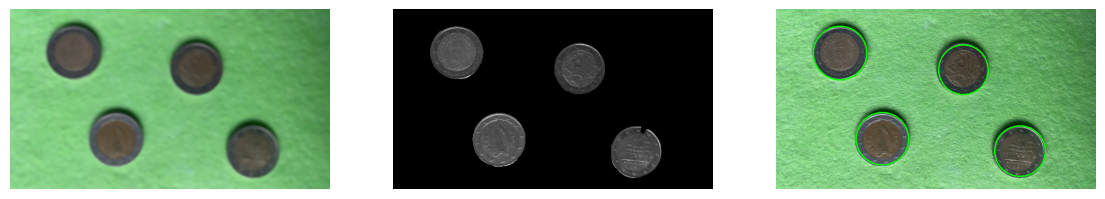

9 tr_2_image_14


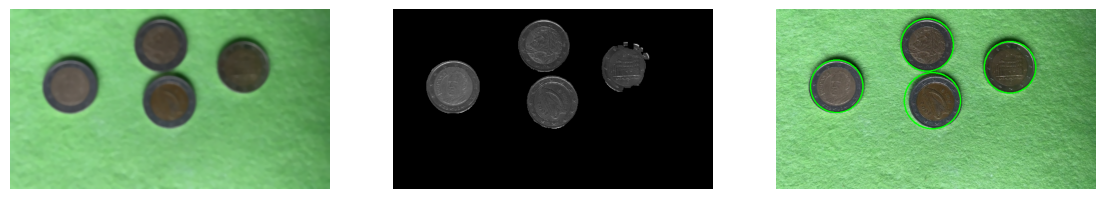

10 tr_2_image_8


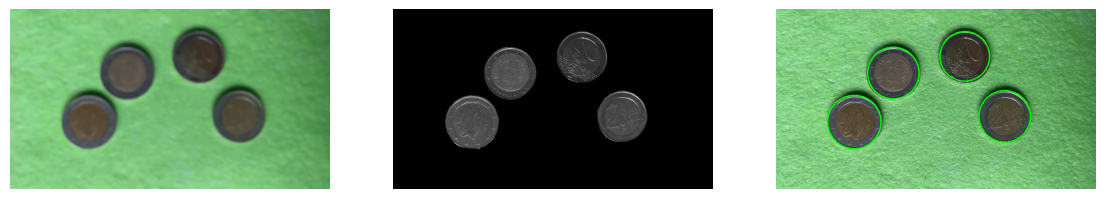

11 tr_2_image_16


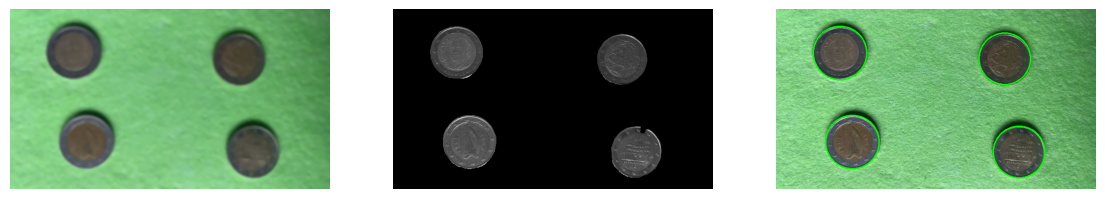

12 tr_2_image_17


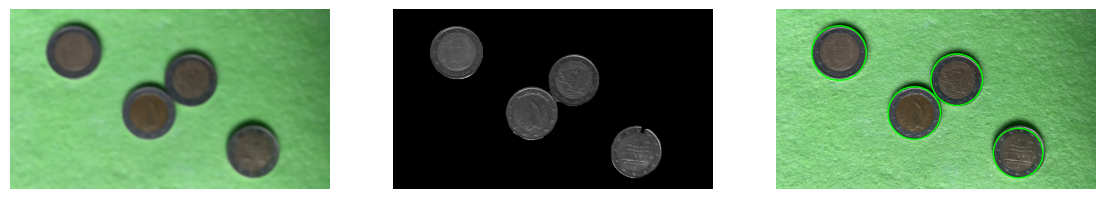

13 tr_2_image_9


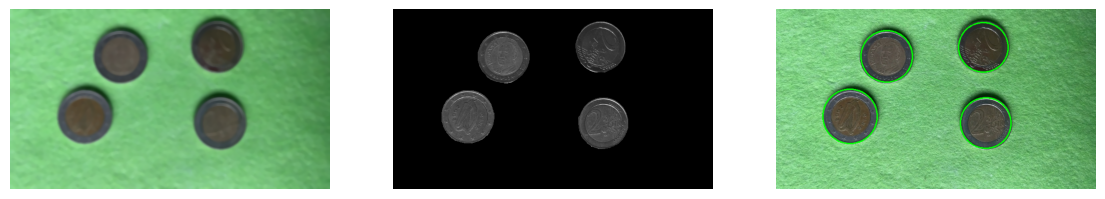

14 tr_2_image_13


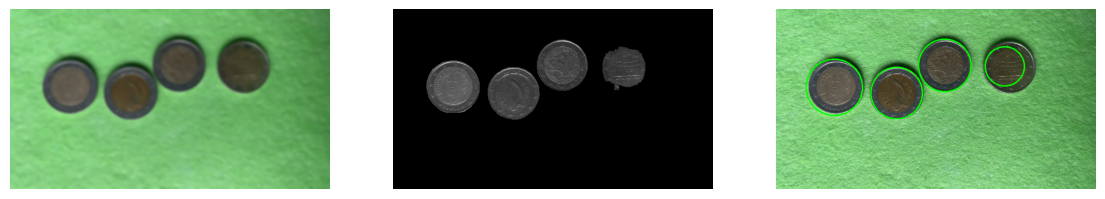

15 tr_2_image_12


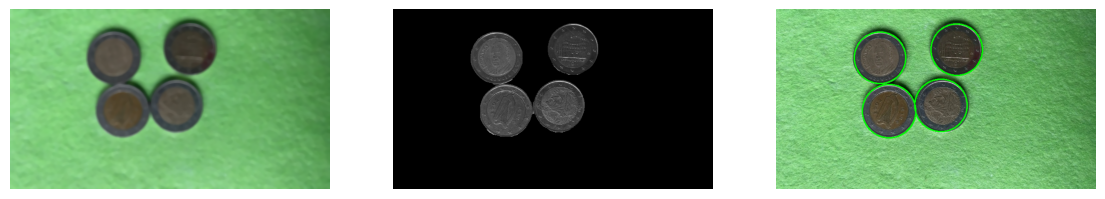

16 tr_2_image_10


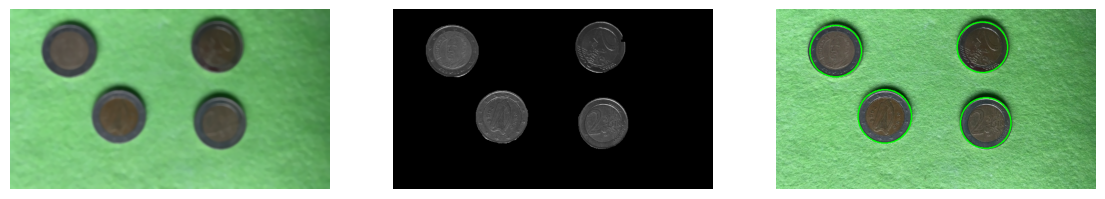

17 tr_2_image_11


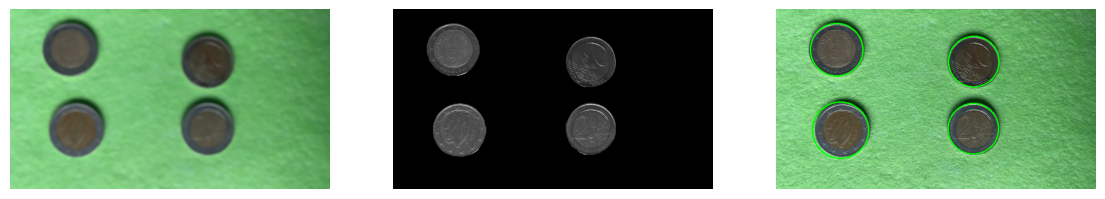

In [8]:
img_files_filter = list(filter(lambda x: 'tr_2' in x, img_files)) # None tr_005 tr_01 tr_02 tr_05 tr_1 tr_2
# img_files_filter = [img_files_filter[0]]
# img_files_filter = ['tr_2_image_15']
# img_files_filter = img_files[:10]
for img_num, img_n in enumerate(img_files_filter):
    img_n = os.path.basename(img_n).split('.')[0]
    img = cv2.imread(f'training/{img_n}.jpg')
    img = cv2.resize(img, None, fx = .7, fy=.7)
    print(img_num, img_n)
    
    imgPre = img
    
    imgPre = cv2.GaussianBlur(img, (7,7), 7)
    imgPre = cv2.medianBlur(imgPre, 7)

    hsv_image = cv2.cvtColor(imgPre, cv2.COLOR_BGR2HSV)
        
    lower_green = np.array([41, 58, 0])  # Límite inferior (H, S, V)
    upper_green = np.array([85, 255, 255])  # Límite superior (H, S, V)

    mask = cv2.inRange(hsv_image, lower_green, upper_green)
    inverse_mask = cv2.bitwise_not(mask)

    
    kernel = np.ones((3,3),np.uint8)
    inverse_mask = cv2.morphologyEx(inverse_mask,cv2.MORPH_OPEN,kernel, iterations = 4)
    # inverse_mask = cv2.dilate(inverse_mask,kernel,iterations=2)

    result = cv2.bitwise_and(img, img, mask=inverse_mask)
    result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
   
#################################
    circulos = cv2.HoughCircles(
    inverse_mask,
    cv2.HOUGH_GRADIENT,
    dp=1.4,               # Inverso de la resolución acumuladora
    minDist=80,           # Distancia mínima entre centros de círculos || 80
    param1=100,            # Umbral del detector de bordes Canny
    param2=15,            # Umbral del acumulador (más bajo = más círculos detectados)
    minRadius=40,         # Radio mínimo de los círculos || 40
    maxRadius=60          # Radio máximo de los círculos || 60
    )
 
    if circulos is not None:
        colors = []
        circulos = np.uint16(np.around(circulos))
        for circulo in circulos[0, :]:
            color = get_color_from_circle(img, (circulo[0], circulo[1]), circulo[2], vis= False)
            colors.append(color)
        
        img_copy = inverse_mask.copy()
        img_copy = cv2.cvtColor(img_copy, cv2.COLOR_GRAY2BGR)
        img2_copy = img.copy()

        f, ax = plt.subplots(1,3,figsize=(14, 14))
        
        ax[0].imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
        ax[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        for n , cir in enumerate(circulos[0]):
            center = cir[:2]
            radius = cir[2]
            cv2.circle(img2_copy, center, radius, (0, 255, 0), 2)
            
        ax[2].imshow(cv2.cvtColor(img2_copy, cv2.COLOR_BGR2RGB))
        ax[0].axis('off')
        ax[1].axis('off')
        ax[2].axis('off')
        plt.show()
        
        # img_cambiar_nombre_de_la_funcion(img, circulos, colors)    
    else:
        print('aqui no hay nadaaaaaaaaaaaaa !!!!!!!')